# Logistic Regression:
---

 We can explore **Classification**in detail, specifically through the use of a technique called **Logistic Regression**, which, despite of its name, is an algorithm for **Binary Classification**.


In [35]:
# Imports:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree



---
## Classification - Deep Dive:
**Classification**is a type of Supervised Machine Learning technique, used for predicting categorical target labels. Classifications can be *binary* or *multi-class*, which are dependant on the number of possible classes they can predict:
- **Binary Classification** - 2 classes
- **Multi-Class Classification** - more than 2 classes

We focus on the following Classifiers:
- **Logistic Regression**
- **Decision Trees**
- **Random Forest Classifiers**

### Examples of Classification Problems:
All Classification problems ultimately boil down predicting the probability of a certain observation falling under a given class. Consider the following examples:
- Predicting the probability of a client getting a mortgage
- Predicting the probability of a customer churning from a bank
- Predicting the probability of a certain desease, given an individual's health metrics
- Predicting the chance of getting a job after graduation


### Linear Regression for Classification?
- Suppose you have **Credit Score** data on existing mortgage customers
- You decide to use this data to predict the chance of a new customer being approved for mortgage, given their credit score
- This means that your predictions must be one of 2 possible values:
    - **0** for Mortgage Rejected
    - **1** for Mortgage Approved
- Linear Regression Models result in *continuous numerical predictions* - e.g. *0.34, 0.96*
- We can use these numbers as the *probability of mortgage approval* by assuming that everything above a given threshold (e.g., threshold = 0.5) means 'Mortgage Approved'
- Linear Regression, however, can result in predictions *above 1* or *below 0*, which would make predictions **difficult to interpret**.

<center>
    <div>
        <img src="./Images/Probability_Of_Mortgage_LinReg.JPG"/>
    </div>
</center>

---
## Logistic Regression:
**Logistic Regression**, despite the name, is a *linear* Machine Learning model for ***Binary Classification***:
- It builds on the idea above, of *predicting the probability of a positive outcome*>
- Mathematically, the produced prediction *$\hat{y}$* is calculated as
$$
\hat{y} = P(Y = 1| X = x)
$$
where:
- $Y$ is the *binary response variable (target)*:
    - 0 = negative outcome
    - 1 = positive outcome
- $P(Y=1|X=x)$ is the probability of a ositive outcome, given inputs **$x$**
- Once the prediction is made, it is classified as either **0** or **1** based on a *probability threshold*, e.g. 0.5, but this can be subject to change 

---
### Sigmoid Function:
We can ensure that our prediction $\hat{y}$ will range from 0 to 1 by using the ***Sigmoid Function***, which transforms the final prediction value $\hat{y}$ such that $0 \leq \hat{y} \leq 1$, so that it can be interpreted as probability. The Sigmoid Function is defined as the following:
$$
\sigma(y) = sigmoid(y) = \frac{1}{1 + e^{-y}}
$$

When performing a **Logistic Regression**, the optimal prediction has the following expression:
$$
\hat{y} = sigmoid(\beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + + \beta_{p}x_{p})
$$

- Since the **Sigmoid Function** always produces output in the range 0 to 1, the Logistic Regression prediction can be interpreted as *probability*
- The *optimal coefficients* $\beta_{0}, \beta_{1}, \dots, \beta_{p}$ are calculated so that the ***average Log Loss*** on the training data is *minimised*.

Logistic Regression is a Linear Model for Binary Classification. It assumes a linear relationship between the inputs (features) and the log-odds of the output. The Sigmoid function is the inverse function of the Log-Odds Function (also called Logit function), hence the name of the model.

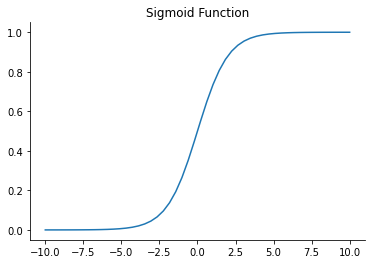

In [36]:
# Visualising the shape of a Sigmoid Function:

def sigmoid(x):
    return 1/(1 + np.exp(-x))

# Define a range of possible values for x
# Iterate through x_axis and calculate the corresponding sigmoid(x)
x_axis = np.linspace(-10,10)
y_axis = []
for x in x_axis:
    y_axis.append(sigmoid(x))

# Plot x_axis vs y_axis to see the S-shape of the Sigmoid Function
g = sns.lineplot(x = x_axis, y= y_axis)
g.set_title('Sigmoid Function')
sns.despine()
plt.show()

---
### Logistic Regression - Example:
We can use Logistic Regression in many real life scenarios. For this case study, we use a dataset called `health_report.csv`. The dataset gives `Height` and `Weight` information about various individuals. In the following task, we can leverage the use of Logistic Regression to *predict the probabilty of being male (`IsMale = 1`) given `Height`:

In [37]:
# Loading the dataset:

filepath = r'./Data/health_report.csv'
df = pd.read_csv(filepath)
display(df.head())
print(f'The dimensions of this dataset are: {df.shape}')

,IsMale,Height,Weight,IsHealthy
0,1,187.571423,109.819678,0
1,1,174.706036,73.688955,1
2,1,188.239668,96.584348,0
3,1,182.196685,99.899282,0
4,1,177.499762,93.682809,0


The dimensions of this dataset are: (10000, 4)


Having an initial look into the data, we can see that it has 10000 rows, where 5000 are Male Individuals and 5000 are Female Individuals:

In [38]:
print('The Male Individuals:')
display(df[df['IsMale'] == 1])
print('The Female Individuals:')
display(df[df['IsMale'] != 1])

The Male Individuals:


,IsMale,Height,Weight,IsHealthy
0,1,187.571423,109.819678,0
1,1,174.706036,73.688955,1
2,1,188.239668,96.584348,0
3,1,182.196685,99.899282,0
4,1,177.499762,93.682809,0
...,...,...,...,...
9496,1,174.904559,80.417498,0
9497,1,175.192494,72.315494,1
9498,1,170.215039,90.434712,0
9499,1,181.756605,84.401283,0


The Female Individuals:


,IsMale,Height,Weight,IsHealthy
4498,0,168.484131,67.067466,1
4499,0,166.578186,65.167724,1
4500,0,163.425936,62.579848,1
4501,0,164.144347,67.611012,0
4502,0,165.547684,63.558342,1
...,...,...,...,...
9995,0,161.015140,65.398422,0
9996,0,158.719611,62.830804,1
9997,0,165.896759,62.143953,1
9998,0,166.144075,66.727593,1


To perform Logistic Regression,we import the `LogisticRegression()` function from the module `sklearn.linear_model`. Recall, we are using `Height` to predict whether the individual is a male or not, so we can carry out Feature Selection accordingly:

In [39]:
# Feature Selection and Train-Test Split
X = df[['Height']]
y = df['IsMale']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise a Logistic Regression Model:
LogisticRegressionModel = LogisticRegression()

# Fit the LogisticRegressionModel to Train Data
LogisticRegressionModel.fit(X_train, y_train)

# Test the LogisticRegressionModel on Test Data
y_pred = LogisticRegressionModel.predict(X_test)

# Evaluating the performance of LogisticRegressionModel
acc = accuracy_score(y_test,y_pred)
print(f'Accuracy Score: {acc:.4f}')

Accuracy Score: 0.8310


In the above Logistic Regression, the predicted probability has the following functional form:

$$
\hat{y} = sigmoid(\beta_{0} + \beta_{1}x)
$$
- $\hat{y}$ is the *probability of being male*
- $x$ is the single feature in our model used for prediction: `Height`
- Once fitted, the model *learns the optimal values* for the coefficients $\beta_{0}$ and $\beta_{1}$
- We can retrieve the optimal coefficient values via the `.intercept_` and `.coef_` attributes:


In [40]:
# Retrieving the optimal values for the coefficients
beta_0 = LogisticRegressionModel.intercept_[0]
beta_1 = LogisticRegressionModel.coef_[0][0]
print(f'beta_0: {beta_0}, beta_1: {beta_1}')

# Comparing a Linear Prediction vs Logistic Regression Prediction:
# Suppose we have a new observation with height -190 cm
print(f'Linear Regression returns {beta_0 + beta_1*190}')
print(f'Logistic Regression returns {sigmoid(beta_0 + beta_1*190)}')

beta_0: -45.141183561795366, beta_1: 0.2679979851436471
Linear Regression returns 5.778433615497583
Logistic Regression returns 0.9969159832671857


- The Sigmoid function returns a **0.9969 probability of being male**
- If we feed the new observation straight into a `model.predict()` we will see a prediction that is already *classified as 0 or 1*. On this case, it will be 1
- To obtain the *prediction probability*, we use the `.predict_proba()` method to check that it also produces 0.9969 as expected:

In [41]:
# Storing the new observation as a dataframe:
new_observation = pd.DataFrame({'Height':[190]})

# Displaying the predicted class by the Logistic Regression:
print(f'The class prediction for the new observation is: {LogisticRegressionModel.predict(new_observation)}')

# Display the predicted probability of a positive outcome by the Logistic Regression
# .predict_proba() returns 2 probabilities - of a negative outcome, and of a positive outcome
print(f'The predicted probability for the new observation is {LogisticRegressionModel.predict_proba(new_observation)}')


The class prediction for the new observation is: [1]
The predicted probability for the new observation is [[0.00308402 0.99691598]]


We can visualise the predicted probabilities obtained through the `.predict_proba()` method:

In [42]:
y_pred_proba = LogisticRegressionModel.predict_proba(X_test)
y_pred_proba_DF = pd.DataFrame(y_pred_proba)
display(y_pred_proba_DF)

,0,1
0,0.009242,0.990758
1,0.029754,0.970246
2,0.955964,0.044036
3,0.458874,0.541126
4,0.038652,0.961348
...,...,...
1995,0.734227,0.265773
1996,0.983616,0.016384
1997,0.615210,0.384790
1998,0.925920,0.074080


We can evaluate the performance of the Logistic Regression Model using the following performance metrics:
- Accuracy Score
- Precision Score
- Recall Score
- F1-Score
- ROC-AUC Score

In [43]:
# Evaluate performance
AccuracyScore = accuracy_score(y_test,y_pred)
PrecisionScore = precision_score(y_test, y_pred)
RecallScore = recall_score(y_test, y_pred)
F1Score = f1_score(y_test, y_pred)
ROC_AUC_SCORE = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {AccuracyScore:.4f}')
print(f'Precision is {PrecisionScore}')
print(f'Recall is {RecallScore}')
print(f'F1 score is {F1Score}')
print(f'ROC AUC is {ROC_AUC_SCORE}')

Accuracy Score: 0.8310
Precision is 0.8246305418719212
Recall is 0.839518555667001
F1 score is 0.8320079522862823
ROC AUC is 0.831025479229313


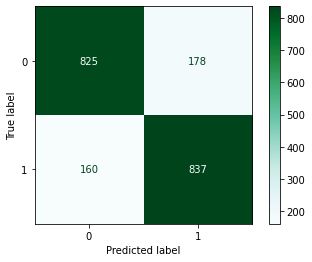

In [44]:
# Plotting the Confusion Matrix

fig, ax = plt.subplots()
g1=ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax = ax, cmap = 'BuGn')

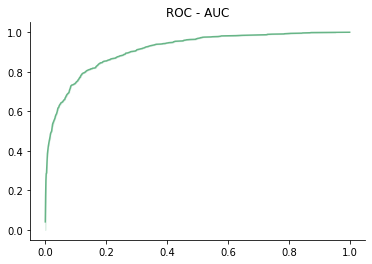

In [45]:
# Plotting the ROC-AUC curve:

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_DF[1])
g2 = sns.lineplot(x = fpr, y= tpr, color = '#67B587')
g2.set_title('ROC - AUC')
sns.despine()
plt.show()

We can further incorporate some *Feature Engineering* and see if we can use another feature to predict the `IsHealthy` target variable. We can devise a new feature `BMI` which combines the features `Height` and `Weight` in the following way: 

$$
BMI = \frac{weight}{height^2} \text{ for weight in kg and height in metres}
$$

We can visualise the relationship `BMI` has with `IsHealthy` using a scatterplot like the following:

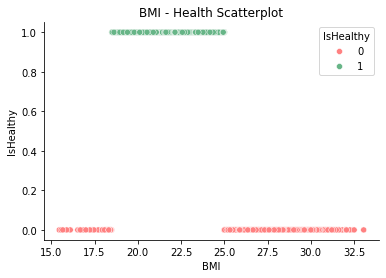

In [46]:
# Feature Engineering the `BMI` column
df['BMI'] = (df['Weight']*10000)/(df['Height']**2)

# With Seaborn, visualise BMI vs IsHealthy in the form of a Scatterplot
hue_colours = {0:'#FF8181', 1: '#67B587'}
g = sns.scatterplot(x = 'BMI', y = 'IsHealthy', data = df, color = '#67B587', hue = 'IsHealthy', palette=hue_colours)
g.set_title('BMI - Health Scatterplot')
sns.despine()
plt.show()


##### Conclusion: 
From the visualisation, we can conclude that the relationship between health status and BMI is non-linear and we can say that *Healthy* individuals are associated with a BMI within the range of **18.5 - 25**

---
Similar to above, we now train a Logistic Regression Model that tries to predict `IsHealthy` by the new `BMI` feature. We carry out the Fit-Predict Workflow and assess model performance:

Accuracy Score: 0.9890
Precision is 0.9925650557620818
Recall is 0.9804161566707467
F1 score is 0.9864532019704434
ROC AUC is 0.9876721527225245


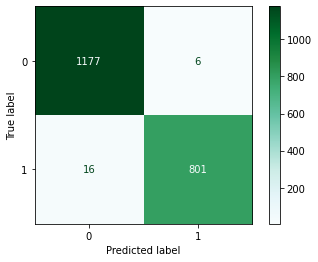

In [47]:
# Feature Selection and Train/Test Split
X = df[['BMI']]
y = df['IsHealthy']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise a Logistic Regression Model
LogisticRegressionModel2 = LogisticRegression()

# Fit Model to Training Data
LogisticRegressionModel2.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred = LogisticRegressionModel2.predict(X_test)

# Evaluate performance
AccuracyScore2 = accuracy_score(y_test,y_pred)
PrecisionScore2 = precision_score(y_test, y_pred)
RecallScore2 = recall_score(y_test, y_pred)
F1Score2 = f1_score(y_test, y_pred)
ROC_AUC_SCORE2 = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {AccuracyScore2:.4f}')
print(f'Precision is {PrecisionScore2}')
print(f'Recall is {RecallScore2}')
print(f'F1 score is {F1Score2}')
print(f'ROC AUC is {ROC_AUC_SCORE2}')

# Plotting the Confusion Matrix
fig, ax = plt.subplots()
g3=ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')

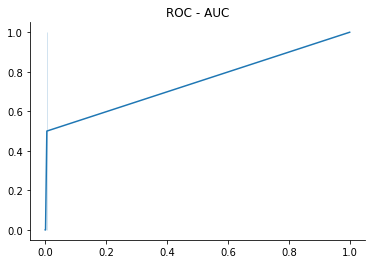

In [48]:
# Plotting the ROC-AUC curve:

y_pred_proba_2 = LogisticRegressionModel2.predict_proba(X_test)
y_pred_proba_DF2 = pd.DataFrame(y_pred_proba_2)

fpr, tpr, thresh = roc_curve(y_test, y_pred_proba_DF2[1])
g4 = sns.lineplot(x = fpr, y= tpr)
g4.set_title('ROC - AUC')
sns.despine()
plt.show()

##### Conclusion: 
The model performs surprisingly well with very high Precision and Recall and almost maximum ROC-AUC. The model, however, misclassified several individuals. Given the domain of the classification problem, identifying the non-healthy individuals, we would like to minimise the False Positives (i.e., non-healthy individuals flagged as healthy by the model) which in turn means that we want to maximise the **Precision Score**.

---
### Health Report - Decision Tree: 
We can also train a **Decision Tree Classifier**, trying to predict **IsHealthy** by the new feature: **BMI** to see how well it performs in comparison to Logistic Regression:

Accuracy Score: 1.0000
Precision is 1.0
Recall is 1.0
F1 score is 1.0
ROC AUC is 1.0


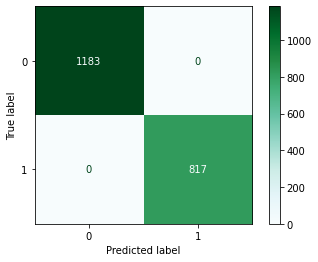

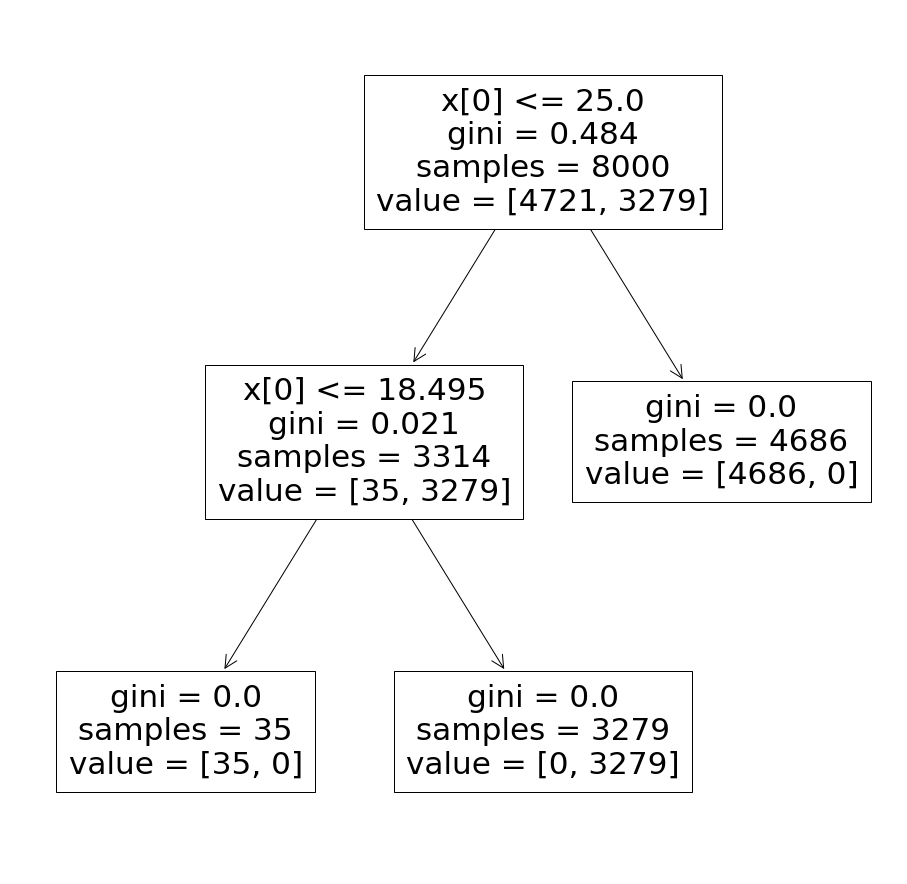

In [49]:
# Feature Selection and Train/Test Split
X = df[['BMI']]
y = df['IsHealthy']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=123)

# Initialise a Decision Tree Classifier Model
DecisionTreeClassifierModel = DecisionTreeClassifier(max_depth=3)

# Fit the Model to Training Data
DecisionTreeClassifierModel.fit(X_train, y_train)

# Make Predictions on Test Data
y_pred = DecisionTreeClassifierModel.predict(X_test)

# Evaluate performance
AccuracyScore_DecisionTree = accuracy_score(y_test,y_pred)
PrecisionScore_DecisionTree = precision_score(y_test, y_pred)
RecallScore_DecisionTree = recall_score(y_test, y_pred)
F1Score_DecisionTree = f1_score(y_test, y_pred)
ROC_AUC_SCORE_DecisionTree = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {AccuracyScore_DecisionTree:.4f}')
print(f'Precision is {PrecisionScore_DecisionTree}')
print(f'Recall is {RecallScore_DecisionTree}')
print(f'F1 score is {F1Score_DecisionTree}')
print(f'ROC AUC is {ROC_AUC_SCORE_DecisionTree}')


# Plotting the Confusion Matrix
fig, ax = plt.subplots()
g=ConfusionMatrixDisplay.from_predictions( y_test, y_pred, ax = ax, cmap = 'BuGn')

# Plotting the Decision Tree to explore conditions
fig, ax = plt.subplots(figsize = (16,16))
plot_tree(DecisionTreeClassifierModel, ax=ax)
plt.show()


##### Conclusion: 
The Decision Tree is a *Perfect Classifier* with all metrics scoring 1 meaning that there are no misclassifications (neither FP nor FN). This confirms our initial observation that BMI and Health have a non-linear relationship. The plotted tree indicates the same cut-off values for BMI as the ones on the scatterplot: **18.5** and **25**

We note here that due to the *simplicity* of the dataset, both ML models performed extremely well and in reality, Precision, Recall and AUC scores around 1 are ***highly unlikely***.